# Yelp Data Preprocessing

In [2]:
import pandas as pd
import os
import glob
import json
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')

path = '/Users/Prayerest_/PycharmProjects/yelp/yelp_dataset/'

file_business, file_checkin, file_review, file_tip, file_user = [
    'business.json',
    'checkin.json',
    'review.json',
    'tip.json',
    'user.json'
]



# Business

In [7]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsPriceRange2': '2', 'GoodForMeal':...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Wednesday': '9:0-0:0', ...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON


In [8]:
dict(df_business[:1])

{'address': 0    2818 E Camino Acequia Drive
 Name: address, dtype: object, 'attributes': 0    {'GoodForKids': 'False'}
 Name: attributes, dtype: object, 'business_id': 0    1SWheh84yJXfytovILXOAQ
 Name: business_id, dtype: object, 'categories': 0    Golf, Active Life
 Name: categories, dtype: object, 'city': 0    Phoenix
 Name: city, dtype: object, 'hours': 0    None
 Name: hours, dtype: object, 'is_open': 0    0
 Name: is_open, dtype: int64, 'latitude': 0    33.522143
 Name: latitude, dtype: float64, 'longitude': 0   -112.018481
 Name: longitude, dtype: float64, 'name': 0    Arizona Biltmore Golf Club
 Name: name, dtype: object, 'postal_code': 0    85016
 Name: postal_code, dtype: object, 'review_count': 0    5
 Name: review_count, dtype: int64, 'stars': 0    3.0
 Name: stars, dtype: float64, 'state': 0    AZ
 Name: state, dtype: object}

In [9]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [10]:
df_business['city'].value_counts().head(10)

Las Vegas     29370
Toronto       18906
Phoenix       18766
Charlotte      9509
Scottsdale     8837
Calgary        7736
Pittsburgh     7017
Montréal       6449
Mesa           6080
Henderson      4892
Name: city, dtype: int64

In [11]:
df_business['state'].value_counts().head(10)

AZ    56686
NV    36312
ON    33412
NC    14720
OH    14697
PA    11216
QC     9219
AB     8012
WI     5154
IL     1932
Name: state, dtype: int64

In [12]:
condition1 = df_business['city'] == 'Las Vegas'
df_filtered = df_business[condition1]
df_filtered = df_filtered.dropna(subset=['categories'], how='all')
condition2 = df_filtered.categories.apply(lambda x: 'Restaurants' in x)
df_filtered = df_filtered[condition2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6450 entries, 17 to 192562
Data columns (total 14 columns):
address         6450 non-null object
attributes      6294 non-null object
business_id     6450 non-null object
categories      6450 non-null object
city            6450 non-null object
hours           5004 non-null object
is_open         6450 non-null int64
latitude        6450 non-null float64
longitude       6450 non-null float64
name            6450 non-null object
postal_code     6450 non-null object
review_count    6450 non-null int64
stars           6450 non-null float64
state           6450 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 755.9+ KB


In [112]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6450 entries, 17 to 192562
Data columns (total 14 columns):
address         6450 non-null object
attributes      6294 non-null object
business_id     6450 non-null object
categories      6450 non-null object
city            6450 non-null object
hours           5004 non-null object
is_open         6450 non-null int64
latitude        6450 non-null float64
longitude       6450 non-null float64
name            6450 non-null object
postal_code     6450 non-null object
review_count    6450 non-null int64
stars           6450 non-null float64
state           6450 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 755.9+ KB


In [113]:
df_filtered.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
17,"1775 E Tropicana Ave, Ste 29","{'BusinessAcceptsCreditCards': 'True', 'BYOBCo...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV
25,6055 E Lake Mead Blvd,"{'BusinessAcceptsCreditCards': 'True', 'HasTV'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Wednesday': '10:0-21:...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV
75,6125 Spring Mountain Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",kANF0dbeoW34s2vwh6Umfw,"Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,None,0,36.125031,-115.225620,Dairy Queen,89146,33,2.0,NV
111,4343 N Rancho Dr,None,X8mtoSxY8whtmbDlj0D3Aw,"Restaurants, Chinese",Las Vegas,None,1,36.238596,-115.233331,Imperial Asian Buffet,89030,4,2.0,NV
135,"Artisan Hotel, 1501 W Sahara Ave","{'BusinessAcceptsCreditCards': 'True', 'Restau...",bJP4l_BGq2CudEu0m-wNjg,"Restaurants, Pizza, Italian, American (New)",Las Vegas,"{'Monday': '16:0-0:0', 'Wednesday': '16:0-0:0'...",0,36.143672,-115.169792,Artisan Fine Dining Room,89102,3,2.0,NV


In [114]:
df_filtered.to_csv("selected_business_all_info.csv",index=False)

In [82]:
con = df_filtered['business_id'] == '2hSIeCX2cV-chFcBBXrZZA'
df_filtered[con]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
14633,"6145 S Fort Apache Rd, Ste 506","{'RestaurantsDelivery': 'False', 'BusinessAcce...",2hSIeCX2cV-chFcBBXrZZA,"Organic Stores, Juice Bars & Smoothies, Coffee...",Las Vegas,"{'Monday': '6:30-16:0', 'Wednesday': '6:30-16:...",1,36.075943,-115.298066,Pressed For Juice,89148,197,4.5,NV


In [13]:
selected_features = [u'business_id', u'name', u'categories', u'stars']
df_selected_business = df_filtered[selected_features]
df_selected_business.head()

,business_id,name,categories,stars
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"Restaurants, Italian",4.0
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",4.5
75,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,"Fast Food, Food, Restaurants, Ice Cream & Froz...",2.0
111,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,"Restaurants, Chinese",2.0
135,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Restaurants, Pizza, Italian, American (New)",2.0


In [14]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns={'stars': 'avg_stars'}, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [15]:
df_selected_business.head()

,business_id,name,categories,avg_stars
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"Restaurants, Italian",4.0
25,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",4.5
75,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,"Fast Food, Food, Restaurants, Ice Cream & Froz...",2.0
111,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,"Restaurants, Chinese",2.0
135,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Restaurants, Pizza, Italian, American (New)",2.0


In [16]:
# Save to ./data/selected_business.csv
df_selected_business.to_csv('selected_business.csv', encoding='utf-8', index = False)

In [17]:
# check reload
df_selected_business_reload = pd.read_csv('selected_business.csv')
df_selected_business_reload.head()

,business_id,name,categories,avg_stars
0,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"Restaurants, Italian",4.0
1,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",4.5
2,kANF0dbeoW34s2vwh6Umfw,Dairy Queen,"Fast Food, Food, Restaurants, Ice Cream & Froz...",2.0
3,X8mtoSxY8whtmbDlj0D3Aw,Imperial Asian Buffet,"Restaurants, Chinese",2.0
4,bJP4l_BGq2CudEu0m-wNjg,Artisan Fine Dining Room,"Restaurants, Pizza, Italian, American (New)",2.0


# Review

In [18]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg


#### Use the "business_id" column to filter review data

In [19]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_selected_business = df_selected_business.set_index('business_id')
df_selected_business.index.names = ['df_left']
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_review = df_review.set_index('business_id')
df_review.index.names = ['df_right']
# Join df_left and df_right.
df_joined = df_selected_business.join(df_review)
df_joined.head()
# Reset index
df_joined_reset = df_joined.reset_index()
df_joined_reset.head()
df_joined_reset.rename(columns={'index': 'business_id'}, inplace = True)
df_joined_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242711 entries, 0 to 1242710
Data columns (total 12 columns):
business_id    1242711 non-null object
name           1242711 non-null object
categories     1242711 non-null object
avg_stars      1242711 non-null float64
cool           1242711 non-null int64
date           1242711 non-null object
funny          1242711 non-null int64
review_id      1242711 non-null object
stars          1242711 non-null float64
text           1242711 non-null object
useful         1242711 non-null int64
user_id        1242711 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 113.8+ MB


In [88]:
df_joined_reset = df_joined.reset_index()
df_joined_reset.rename(columns={'index': 'business_id'}, inplace = True)

In [20]:
df_joined_reset.to_csv('joined_business_review_all.csv', encoding='utf-8', index = False)

In [3]:
#df_joined_reset = pd.read_csv('joined_business_review_all.csv')

In [83]:
df_joined_reset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242711 entries, SFftbQSwHZ24ahhfj5vVxQ to 6Aqot7bwAqkrcfGsRk8HIw
Data columns (total 11 columns):
business_id    1242711 non-null object
name           1242711 non-null object
categories     1242711 non-null object
avg_stars      1242711 non-null float64
cool           1242711 non-null int64
date           1242711 non-null datetime64[ns]
funny          1242711 non-null int64
review_id      1242711 non-null object
stars          1242711 non-null float64
text           1242711 non-null object
useful         1242711 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 113.8+ MB


In [84]:
df_joined_reset['date'] = pd.to_datetime(df_joined_reset['date'])

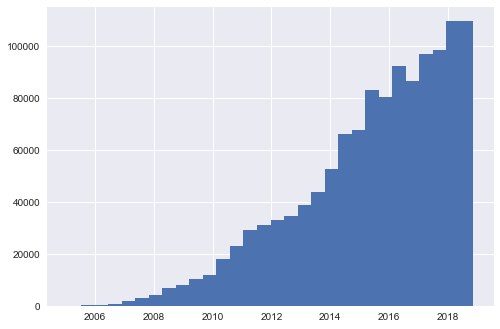

In [85]:
df_joined_reset['date'].hist(bins=30)

In [5]:
max(df_joined_reset['date'])

Timestamp('2018-11-14 18:12:40')

In [6]:
min(df_joined_reset['date'])

Timestamp('2005-01-24 22:21:29')

In [86]:
df_joined_reset.groupby('user_id').agg('count').name.describe()

count    439163.000000
mean          2.829726
std           8.098200
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        1382.000000
Name: name, dtype: float64

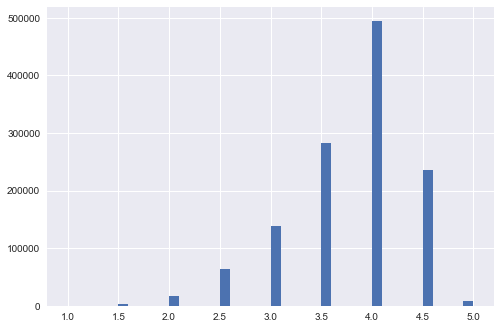

In [42]:
df_joined_reset['avg_stars'].hist(bins=40)

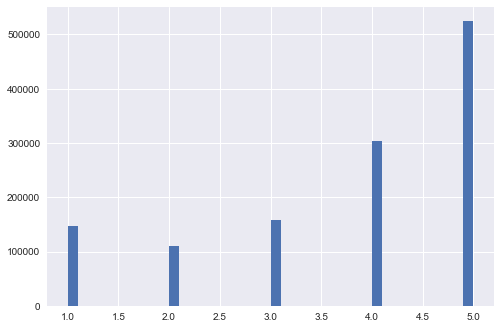

In [43]:
df_joined_reset['stars'].hist(bins=40)

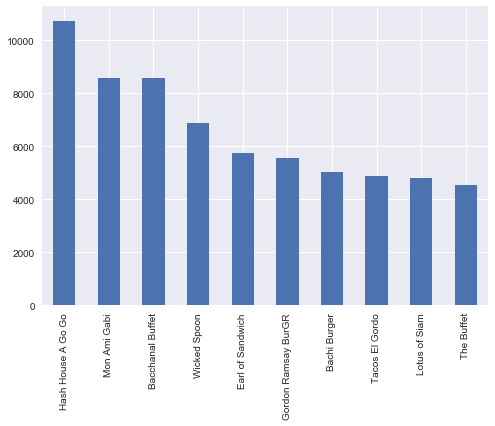

In [44]:
df_joined_reset['name'].value_counts().head(10).plot.bar()

In [89]:
user_select = df_joined_reset['user_id'].value_counts()
df_joined_reset = df_joined_reset.set_index('user_id')
df_selected = df_joined_reset[user_select > 10]
df_selected_reset = df_selected.reset_index()
df_selected_reset.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful
0,n_HMBasYWRQxVjts_QyF9w,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2014-03-14 04:56:09,0,7H98TWCrkyRxo8DMfYrWRA,5.0,this place hasnt change a bit in their service...,0
1,tXhscxwFTd-ayLTdPx_2yA,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2012-05-28 15:40:38,1,jTlP9izKAXbF9T91pbP7RA,3.0,"I've eaten here twice, it was better a few yea...",0
2,y4O_c6UUAAtPb3Uk-T4t8A,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2017-08-16 06:41:49,0,WYNusZjgf6BsISk829MQKw,5.0,A great culinary experience from start to fini...,0
3,_0Za7N9v4rcUVxHy107a7Q,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2015-11-18 21:41:50,0,cHsv7KZDouejMVih43qRUQ,5.0,Had Dinner at Delmonico on 11-5-15. Still the...,0
4,aZg019PkWURjSnC7-CH0Bw,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2013-05-29 07:23:34,0,CVkTL2dfXOdtpMeFhtWayw,5.0,My wife took me here for a fabulous dinner bef...,0


In [90]:
df_item = df_selected_reset

In [91]:
df_item.head()

,user_id,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful
0,n_HMBasYWRQxVjts_QyF9w,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2014-03-14 04:56:09,0,7H98TWCrkyRxo8DMfYrWRA,5.0,this place hasnt change a bit in their service...,0
1,tXhscxwFTd-ayLTdPx_2yA,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2012-05-28 15:40:38,1,jTlP9izKAXbF9T91pbP7RA,3.0,"I've eaten here twice, it was better a few yea...",0
2,y4O_c6UUAAtPb3Uk-T4t8A,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2017-08-16 06:41:49,0,WYNusZjgf6BsISk829MQKw,5.0,A great culinary experience from start to fini...,0
3,_0Za7N9v4rcUVxHy107a7Q,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2015-11-18 21:41:50,0,cHsv7KZDouejMVih43qRUQ,5.0,Had Dinner at Delmonico on 11-5-15. Still the...,0
4,aZg019PkWURjSnC7-CH0Bw,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2013-05-29 07:23:34,0,CVkTL2dfXOdtpMeFhtWayw,5.0,My wife took me here for a fabulous dinner bef...,0


In [92]:
item_select = df_item['business_id'].value_counts()
df_item_set = df_item.set_index('business_id')
df_selected_item = df_item_set[item_select > 10]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
df_item_reset = df_selected_item.reset_index()
df_item_reset.head()

,business_id,user_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful
0,--9e1ONYQuAa-CB_Rrw7Tw,n_HMBasYWRQxVjts_QyF9w,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2014-03-14 04:56:09,0,7H98TWCrkyRxo8DMfYrWRA,5.0,this place hasnt change a bit in their service...,0
1,--9e1ONYQuAa-CB_Rrw7Tw,tXhscxwFTd-ayLTdPx_2yA,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2012-05-28 15:40:38,1,jTlP9izKAXbF9T91pbP7RA,3.0,"I've eaten here twice, it was better a few yea...",0
2,--9e1ONYQuAa-CB_Rrw7Tw,y4O_c6UUAAtPb3Uk-T4t8A,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2017-08-16 06:41:49,0,WYNusZjgf6BsISk829MQKw,5.0,A great culinary experience from start to fini...,0
3,--9e1ONYQuAa-CB_Rrw7Tw,_0Za7N9v4rcUVxHy107a7Q,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2015-11-18 21:41:50,0,cHsv7KZDouejMVih43qRUQ,5.0,Had Dinner at Delmonico on 11-5-15. Still the...,0
4,--9e1ONYQuAa-CB_Rrw7Tw,aZg019PkWURjSnC7-CH0Bw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2013-05-29 07:23:34,0,CVkTL2dfXOdtpMeFhtWayw,5.0,My wife took me here for a fabulous dinner bef...,0


In [94]:
df_item_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414453 entries, 0 to 414452
Data columns (total 12 columns):
business_id    414453 non-null object
user_id        414453 non-null object
name           414453 non-null object
categories     414453 non-null object
avg_stars      414453 non-null float64
cool           414453 non-null int64
date           414453 non-null object
funny          414453 non-null int64
review_id      414453 non-null object
stars          414453 non-null float64
text           414453 non-null object
useful         414453 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 37.9+ MB


In [111]:
len(df_item_reset.business_id.unique())

4218

In [96]:
len(df_item_reset.user_id.unique())

16255

In [97]:
df_item_reset.groupby('user_id').agg('count').name.describe()

count    16255.000000
mean        25.496955
std         32.502660
min          5.000000
25%         13.000000
50%         16.000000
75%         26.000000
max       1270.000000
Name: name, dtype: float64

In [98]:
df_item_reset.groupby('user_id').agg('count').min()

business_id    5
name           5
categories     5
avg_stars      5
cool           5
date           5
funny          5
review_id      5
stars          5
text           5
useful         5
dtype: int64

In [99]:
df_item_reset.groupby('business_id').agg('count').min()

user_id       11
name          11
categories    11
avg_stars     11
cool          11
date          11
funny         11
review_id     11
stars         11
text          11
useful        11
dtype: int64

In [100]:
user_select_2 = df_item_reset['user_id'].value_counts()
df_item_reset_2 = df_item_reset.set_index('user_id')
df_selected_user_2 = df_item_reset_2[user_select_2 > 10]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [101]:
df_item_reset_2 = df_selected_user_2.reset_index()
df_item_reset_2.head()

,user_id,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful
0,n_HMBasYWRQxVjts_QyF9w,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2014-03-14 04:56:09,0,7H98TWCrkyRxo8DMfYrWRA,5.0,this place hasnt change a bit in their service...,0
1,tXhscxwFTd-ayLTdPx_2yA,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2012-05-28 15:40:38,1,jTlP9izKAXbF9T91pbP7RA,3.0,"I've eaten here twice, it was better a few yea...",0
2,y4O_c6UUAAtPb3Uk-T4t8A,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2017-08-16 06:41:49,0,WYNusZjgf6BsISk829MQKw,5.0,A great culinary experience from start to fini...,0
3,_0Za7N9v4rcUVxHy107a7Q,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2015-11-18 21:41:50,0,cHsv7KZDouejMVih43qRUQ,5.0,Had Dinner at Delmonico on 11-5-15. Still the...,0
4,aZg019PkWURjSnC7-CH0Bw,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2013-05-29 07:23:34,0,CVkTL2dfXOdtpMeFhtWayw,5.0,My wife took me here for a fabulous dinner bef...,0


In [81]:
con = df_item_reset_2['business_id'] == '2hSIeCX2cV-chFcBBXrZZA'
df_item_reset_2[con]

,user_id,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful
10969,w1uEa7272-ZXdiTm0aDM8A,2hSIeCX2cV-chFcBBXrZZA,Pressed For Juice,"Organic Stores, Juice Bars & Smoothies, Coffee...",4.5,0,2016-05-31 10:53:47,0,ej_Bo4_WfYx_5NdfJnLHQQ,5.0,I love this place! It's a little out of the wa...,0
10970,Apj8bnqWlnaiSu4YDl0wDA,2hSIeCX2cV-chFcBBXrZZA,Pressed For Juice,"Organic Stores, Juice Bars & Smoothies, Coffee...",4.5,1,2015-05-26 11:28:20,1,AeTukpOGdVe3rGGck7_x6g,5.0,I love the modern design inside and very welco...,0
10971,_UUmslYG8Y-IYFf8rHl0Ww,2hSIeCX2cV-chFcBBXrZZA,Pressed For Juice,"Organic Stores, Juice Bars & Smoothies, Coffee...",4.5,1,2015-04-29 05:11:04,0,A8meHAtEv1tFgWHcuwucXA,5.0,This stuff is my crack. I've been dodging my ...,3
10972,7YWkpjUb-YWbfpN7d7sRqg,2hSIeCX2cV-chFcBBXrZZA,Pressed For Juice,"Organic Stores, Juice Bars & Smoothies, Coffee...",4.5,0,2017-07-08 22:33:36,0,sLNMVyhyd-FtiCiTXEzOvg,5.0,All I've tried from here was the Dos Leches nu...,0
10973,cFGAElozHTdQDfHimOiSBQ,2hSIeCX2cV-chFcBBXrZZA,Pressed For Juice,"Organic Stores, Juice Bars & Smoothies, Coffee...",4.5,2,2016-10-14 05:40:15,1,NM9T5SEBTlpyuDmpQWnDAg,3.0,I finally decided to give this place a second ...,6
10974,fQ9owsz3ap05vrGrTLPa4Q,2hSIeCX2cV-chFcBBXrZZA,Pressed For Juice,"Organic Stores, Juice Bars & Smoothies, Coffee...",4.5,0,2016-06-12 17:26:06,0,uXm7_kgJldDWKmKPLZpvzw,5.0,Love this place ! #4 local hottie and the holy...,0
10975,oK1v-yP9ygKWg6M19wWYIQ,2hSIeCX2cV-chFcBBXrZZA,Pressed For Juice,"Organic Stores, Juice Bars & Smoothies, Coffee...",4.5,0,2017-07-29 15:47:32,0,dUdvCuydmA9ysPw2S609Sw,3.0,"I really really wanted to love this place, but...",1
10976,Jiw8Gd0ZCekHBDK74fyHMg,2hSIeCX2cV-chFcBBXrZZA,Pressed For Juice,"Organic Stores, Juice Bars & Smoothies, Coffee...",4.5,4,2016-03-18 22:49:40,2,RylPqItjM8Bw2jh0uHlIrw,5.0,This place is the best in town. Everything fro...,3
10977,fS86t0IvNj-kDBae2mJHSQ,2hSIeCX2cV-chFcBBXrZZA,Pressed For Juice,"Organic Stores, Juice Bars & Smoothies, Coffee...",4.5,0,2015-07-16 22:14:21,0,P3h-yboIdFkshEBqHRo4EQ,5.0,I got the Green Milk for myself and the Threes...,1
10978,ZiO2Wr41kZ4Vz64aheBFPQ,2hSIeCX2cV-chFcBBXrZZA,Pressed For Juice,"Organic Stores, Juice Bars & Smoothies, Coffee...",4.5,0,2016-11-23 00:06:37,0,L0Y2QtQkF97t7HhjJKHyDQ,5.0,Step right up to try and taste what juice blen...,0


In [109]:
df_item_reset_2.head()

,user_id,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful
0,n_HMBasYWRQxVjts_QyF9w,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2014-03-14 04:56:09,0,7H98TWCrkyRxo8DMfYrWRA,5.0,this place hasnt change a bit in their service...,0
1,tXhscxwFTd-ayLTdPx_2yA,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2012-05-28 15:40:38,1,jTlP9izKAXbF9T91pbP7RA,3.0,"I've eaten here twice, it was better a few yea...",0
2,y4O_c6UUAAtPb3Uk-T4t8A,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2017-08-16 06:41:49,0,WYNusZjgf6BsISk829MQKw,5.0,A great culinary experience from start to fini...,0
3,_0Za7N9v4rcUVxHy107a7Q,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2015-11-18 21:41:50,0,cHsv7KZDouejMVih43qRUQ,5.0,Had Dinner at Delmonico on 11-5-15. Still the...,0
4,aZg019PkWURjSnC7-CH0Bw,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2013-05-29 07:23:34,0,CVkTL2dfXOdtpMeFhtWayw,5.0,My wife took me here for a fabulous dinner bef...,0


In [110]:
df_item_reset_2.tail()

,user_id,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful
410040,R9Bm86DXed10xMvhJrcDdQ,zzzaIBwimxVej4tY6qFOUQ,Guthrie's,"Southern, Restaurants",3.5,0,2012-12-01 21:13:14,0,HXN_Lo5hF9gqlFgaBdxkCg,1.0,ordered the 7 strip and the chicken box would ...,2
410041,BP652XN-JNMhMWzNgZHSRg,zzzaIBwimxVej4tY6qFOUQ,Guthrie's,"Southern, Restaurants",3.5,0,2012-12-24 02:19:28,0,iW5AiBrTtAGgXe3KqANItg,5.0,Guthrie's is a great choice for people who are...,2
410042,jhaT21VWZVtW2zXPVmzeyg,zzzaIBwimxVej4tY6qFOUQ,Guthrie's,"Southern, Restaurants",3.5,0,2012-11-29 22:13:10,0,1WgXVPm4FuMQl07COCBtyw,4.0,Guthrie's is all about one main thing: chicken...,4
410043,mySDXsBhY3u0yI-G2oVDkA,zzzaIBwimxVej4tY6qFOUQ,Guthrie's,"Southern, Restaurants",3.5,1,2013-02-18 21:37:17,0,ql4lCsHh45lXZrf4F2S3yg,4.0,"I have to say, I do like this place a lot more...",1
410044,-gfC7auUsRN2KqTBzHMBZg,zzzaIBwimxVej4tY6qFOUQ,Guthrie's,"Southern, Restaurants",3.5,0,2013-06-14 23:17:36,1,PBs0VwO7arZqlIba6rAVuA,4.0,This is a familiar place to me. I frequented t...,1


In [102]:
df_item_reset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410045 entries, 0 to 410044
Data columns (total 12 columns):
user_id        410045 non-null object
business_id    410045 non-null object
name           410045 non-null object
categories     410045 non-null object
avg_stars      410045 non-null float64
cool           410045 non-null int64
date           410045 non-null object
funny          410045 non-null int64
review_id      410045 non-null object
stars          410045 non-null float64
text           410045 non-null object
useful         410045 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 37.5+ MB


In [103]:
df_item_reset_2.groupby('user_id').agg('count').min()

business_id    11
name           11
categories     11
avg_stars      11
cool           11
date           11
funny          11
review_id      11
stars          11
text           11
useful         11
dtype: int64

In [104]:
df_item_reset_2.groupby('business_id').agg('count').min()

user_id       8
name          8
categories    8
avg_stars     8
cool          8
date          8
funny         8
review_id     8
stars         8
text          8
useful        8
dtype: int64

In [106]:
len(df_item_reset_2.business_id.unique())

4218

In [107]:
len(df_item_reset_2.user_id.unique())

15801

In [108]:
df_item_reset_2.to_csv('all_10.csv', index = False)

In [98]:
item_select_3 = df_item_reset_2['business_id'].value_counts()
df_item_set_3 = df_item_reset_2.set_index('business_id')
df_selected_item = df_item_set_3[item_select_3 > 2]

/Users/Prayerest_/anaconda/envs/python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [99]:
df_item_reset = df_selected_item.reset_index()
df_item_reset.head()

,business_id,user_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful
0,--9e1ONYQuAa-CB_Rrw7Tw,SFftbQSwHZ24ahhfj5vVxQ,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2015-10-23 13:23:34,0,eCJObv4SZupXH5TKWaUhSg,2.0,Very busy and noisy restaurant.\nAsparagas was...,0
1,--9e1ONYQuAa-CB_Rrw7Tw,joe4i-lcCFd2wViA2agGKw,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2018-05-08 16:39:25,0,tTD3wegtsiHOjVTLgsb7FA,5.0,On yelp 5 stars = Woohoo! as good as it gets! ...,0
2,--9e1ONYQuAa-CB_Rrw7Tw,n_HMBasYWRQxVjts_QyF9w,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2014-03-14 04:56:09,0,7H98TWCrkyRxo8DMfYrWRA,5.0,this place hasnt change a bit in their service...,0
3,--9e1ONYQuAa-CB_Rrw7Tw,tXhscxwFTd-ayLTdPx_2yA,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2012-05-28 15:40:38,1,jTlP9izKAXbF9T91pbP7RA,3.0,"I've eaten here twice, it was better a few yea...",0
4,--9e1ONYQuAa-CB_Rrw7Tw,azcT4FIP0FCrCwbMQ51HpQ,Delmonico Steakhouse,"Cajun/Creole, Seafood, Steakhouses, Restaurants",4.0,0,2013-12-07 01:44:23,0,cKMqmXYq7643CF8rao330w,5.0,This is part of my steak house reviews for Las...,2


In [102]:
df_item_reset.groupby('user_id').agg('count').min()

business_id    3
name           3
categories     3
avg_stars      3
cool           3
date           3
funny          3
review_id      3
stars          3
text           3
useful         3
dtype: int64

In [104]:
df_item_reset.groupby('business_id').agg('count').min()

user_id       3
name          3
categories    3
avg_stars     3
cool          3
date          3
funny         3
review_id     3
stars         3
text          3
useful        3
dtype: int64

In [105]:
df_item_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834551 entries, 0 to 834550
Data columns (total 12 columns):
business_id    834551 non-null object
user_id        834551 non-null object
name           834551 non-null object
categories     834551 non-null object
avg_stars      834551 non-null float64
cool           834551 non-null int64
date           834551 non-null datetime64[ns]
funny          834551 non-null int64
review_id      834551 non-null object
stars          834551 non-null float64
text           834551 non-null object
useful         834551 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 76.4+ MB


In [106]:
df_item_reset.to_csv('all_33.csv', index = False)

In [107]:
df_sort = df_item_reset.sort_values(by='date')

In [108]:
df_sort.head()

,business_id,user_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful
303974,LkMtMHVetws5_7QfRjPtlg,Ud72j_rglYmXrL_O8zCdoA,LVH - Las Vegas Hotel & Casino,"Restaurants, Casinos, Food, Active Life, Night...",2.5,0,2005-01-24 22:21:29,0,Dm7Jh7tVp_97sOxEYH4DnA,4.0,"This is a little bit off the strip, but the vi...",0
634626,ii8sAGBexBOJoYRFafF9XQ,Ud72j_rglYmXrL_O8zCdoA,Paris Las Vegas Hotel & Casino,"Restaurants, Hotels, Hotels & Travel, Event Pl...",3.0,0,2005-01-24 22:32:33,0,VwlljS4oxU4VyP2ODo9gwA,5.0,The buffet in this hotel is excellent! The set...,0
494972,ZkGDCVKSdf8m76cnnalL-A,Ud72j_rglYmXrL_O8zCdoA,Le Village Buffet,"Sandwiches, French, Breakfast & Brunch, Buffet...",3.0,0,2005-01-26 17:50:53,0,Z54-ssb69Mx_lG1YtJ6N1g,5.0,Hella food there!! Cocktail shrimps are great!...,0
453014,Wxxvi3LZbHNIDwJ-ZimtnA,NkVYcoaThHjOfTTgq6OdHQ,The Venetian Las Vegas,"Shopping Centers, Resorts, Arts & Entertainmen...",4.0,1,2005-04-22 20:07:39,2,0NmMH1xSUdI3pqed9WQQww,5.0,outstanding hotel. we had a really amazing sui...,2
100660,6xgcHeLad-VaoTIQewK84A,G5LXEaxhQMF_BVjNHkVr7g,N9NE Steakhouse,"Seafood, Steakhouses, American (Traditional), ...",4.0,0,2005-04-27 23:38:05,0,VgBxQqaDgOHq9YRxtMUm3A,5.0,A very reliable source tells me this is the be...,0


In [109]:
df_sort.to_csv('all_33_date.csv', index = False)